In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data = pd.read_csv("M810641.csv", skiprows=10, skipfooter=9, thousands=',').T
df = data.iloc[1:]
for i, v in enumerate(data.iloc[0]):
    print(i, v)

C:\Users\notes\Anaconda3\envs\sg-divorces\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


0 Total Aged 20-29 Years
1   Single
2   Married
3   Widowed
4   Divorced/Separated
5 Males Aged 20-29 Years
6   Single
7   Married
8   Widowed
9   Divorced/Separated
10 Females Aged 20-29 Years
11   Single
12   Married
13   Widowed
14   Divorced/Separated
15 Total Aged 30-39 Years
16   Single
17   Married
18   Widowed
19   Divorced/Separated
20 Males Aged 30-39 Years
21   Single
22   Married
23   Widowed
24   Divorced/Separated
25 Females Aged 30-39 Years
26   Single
27   Married
28   Widowed
29   Divorced/Separated
30 Total Aged 40-49 Years
31   Single
32   Married
33   Widowed
34   Divorced/Separated
35 Males Aged 40-49 Years
36   Single
37   Married
38   Widowed
39   Divorced/Separated
40 Females Aged 40-49 Years
41   Single
42   Married
43   Widowed
44   Divorced/Separated
45 Total Aged 50-59 Years
46   Single
47   Married
48   Widowed
49   Divorced/Separated
50 Males Aged 50-59 Years
51   Single
52   Married
53   Widowed
54   Divorced/Separated
55 Females Aged 50-59 Years
56   Sin

In [6]:
df.index = pd.to_datetime(df.index).year

In [7]:
cols_total = list(range(0, 90, 15))
cols_divorced = list(range(4, 90, 15))
df_divorce_rate = df[cols_divorced].sum(axis=1) / df[cols_total].sum(axis=1) * 100

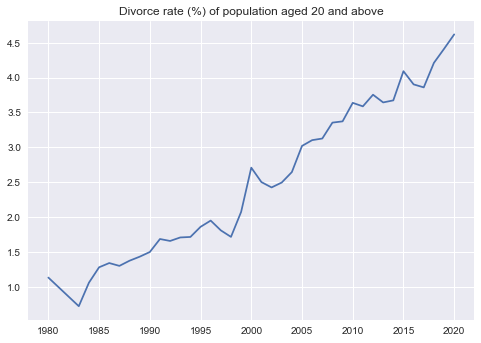

In [8]:
plt.title("Divorce rate (%) of population aged 20 and above")
plt.plot(df_divorce_rate)
plt.show()

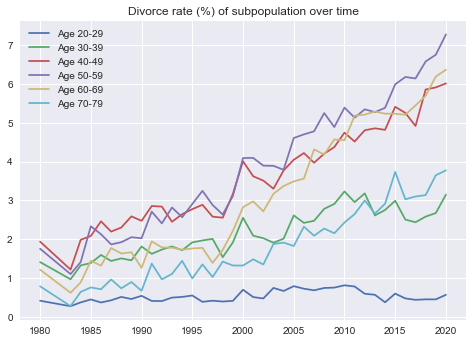

In [9]:
plt.title("Divorce rate (%) of subpopulation over time")
for i in range(0, 90, 15):
    plt.plot(df[i+4] / df[i] * 100, label=f'Age {i//15*10+20}-{i//15*10+29}')
plt.legend(loc='best')
plt.show()

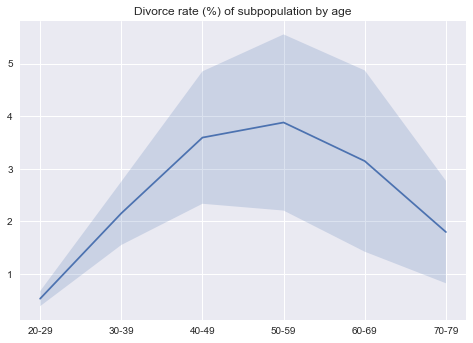

In [10]:
df2 = pd.DataFrame()
for i in range(0, 90, 15):
    df2[i//15] = df[i+4] / df[i] * 100
    
means = np.array([df2[i].mean() for i in range(6)])
std = np.array([df2[i].std() for i in range(6)])

plt.title("Divorce rate (%) of subpopulation by age")
xs = [f'{i//15*10+20}-{i//15*10+29}' for i in range(0,90,15)]
plt.plot(means)
plt.fill_between(xs, means+std, means-std, alpha=0.2)
plt.show()

In [11]:
df[0]

2020    527900
2019    509500
2018    509700
2017    500600
2016    525800
2015    501100
2014    505500
2013    491700
2012    504100
2011    498400
2010    503800
2009    477400
2008    456900
2007    453200
2006    454600
2005    455200
2004    449700
2003    442400
2002    443500
2001    450700
2000    458000
1999    460200
1998    455400
1997    479900
1996    464900
1995    472100
1994    505700
1993    503400
1992    515800
1991    511500
1990    516000
1989    521500
1988    525100
1987    538600
1986    539200
1985    534300
1984    536100
1983    545900
1980    505000
Name: 0, dtype: object

In [12]:
df3 = pd.DataFrame()

In [13]:
for i in range(0, 90, 15):
    df3[i//15] = df[i+4].groupby(df.index // 10).mean() / df[i].groupby(df.index // 10).mean() * 100

In [14]:
df3

,0,1,2,3,4,5
198,0.409826,1.398682,2.124236,1.838401,1.340956,0.729464
199,0.454462,1.807364,2.733221,2.751083,1.748686,1.179643
200,0.680377,2.378817,3.908477,4.457867,3.588299,1.903933
201,0.554433,2.796547,5.108914,5.829380,5.368320,3.064644
202,0.568289,3.148551,6.013436,7.274846,6.363989,3.773101


In [15]:
divorce_rate_gen = [df3.values.diagonal(i) for i in range(-4, 1)]
divorce_rate_gen

[array([0.56828945]),
 array([0.55443349, 3.14855133]),
 array([0.68037696, 2.79654687, 6.01343602]),
 array([0.45446171, 2.37881736, 5.10891407, 7.27484601]),
 array([0.40982641, 1.80736397, 3.90847651, 5.82937994, 6.36398913])]

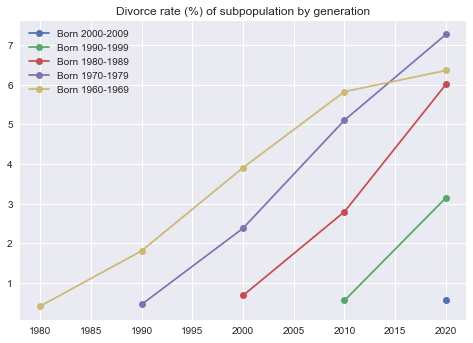

In [16]:
plt.title("Divorce rate (%) of subpopulation by generation")
xs = []
for i in range(4, -1, -1):
    xs.append([i for i in range(1980 + i*10, 2030, 10)])
labels = [f'Born {i}-{i+9}' for i in range(2000, 1959, -10)]
for i, gen in enumerate(divorce_rate_gen):
    plt.plot(xs[i], gen, 'o-', label=labels[i])
plt.legend(loc='best')
plt.show()

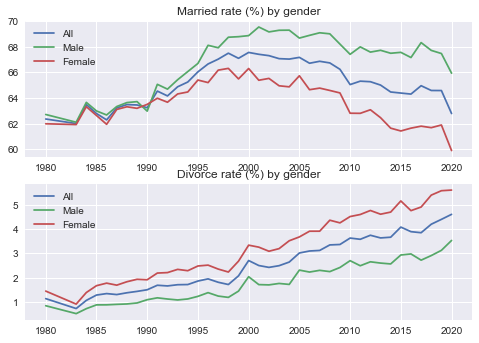

In [21]:
cols_total = list(range(0, 90, 15))
cols_married = list(range(2, 90, 15))
cols_divorced = list(range(4, 90, 15))

cols_total_male = list(range(5, 90, 15))
cols_married_male = list(range(7, 90, 15))
cols_divorced_male = list(range(9, 90, 15))

cols_total_female = list(range(10, 90, 15))
cols_married_female = list(range(12, 90, 15))
cols_divorced_female = list(range(14, 90, 15))

df_married_rate = df[cols_married].sum(axis=1) / df[cols_total].sum(axis=1) * 100
df_married_rate_male = df[cols_married_male].sum(axis=1) / df[cols_total_male].sum(axis=1) * 100
df_married_rate_female = df[cols_married_female].sum(axis=1) / df[cols_total_female].sum(axis=1) * 100

df_divorce_rate = df[cols_divorced].sum(axis=1) / df[cols_total].sum(axis=1) * 100
df_divorce_rate_male = df[cols_divorced_male].sum(axis=1) / df[cols_total_male].sum(axis=1) * 100
df_divorce_rate_female = df[cols_divorced_female].sum(axis=1) / df[cols_total_female].sum(axis=1) * 100

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title("Married rate (%) by gender")
ax1.plot(df_married_rate, label='All')
ax1.plot(df_married_rate_male, label='Male')
ax1.plot(df_married_rate_female, label='Female')
ax1.legend(loc='best')

ax2.set_title("Divorce rate (%) by gender")
ax2.plot(df_divorce_rate, label='All')
ax2.plot(df_divorce_rate_male, label='Male')
ax2.plot(df_divorce_rate_female, label='Female')

ax2.legend(loc='best')
plt.show()

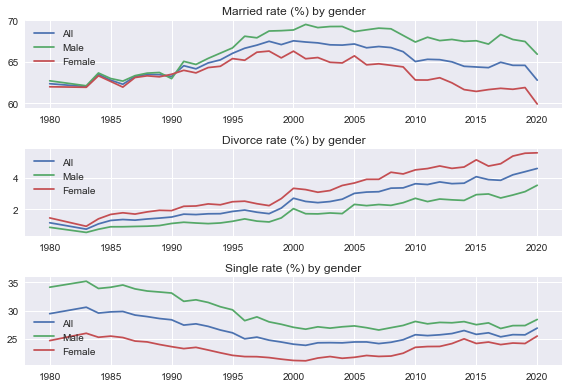

In [25]:
cols_total = list(range(0, 90, 15))
cols_married = list(range(2, 90, 15))
cols_divorced = list(range(4, 90, 15))
cols_single = list(range(1, 90, 15))

cols_total_male = list(range(5, 90, 15))
cols_married_male = list(range(7, 90, 15))
cols_divorced_male = list(range(9, 90, 15))
cols_single_male = list(range(6, 90, 15))

cols_total_female = list(range(10, 90, 15))
cols_married_female = list(range(12, 90, 15))
cols_divorced_female = list(range(14, 90, 15))
cols_single_female = list(range(11, 90, 15))

df_married_rate = df[cols_married].sum(axis=1) / df[cols_total].sum(axis=1) * 100
df_married_rate_male = df[cols_married_male].sum(axis=1) / df[cols_total_male].sum(axis=1) * 100
df_married_rate_female = df[cols_married_female].sum(axis=1) / df[cols_total_female].sum(axis=1) * 100

df_divorce_rate = df[cols_divorced].sum(axis=1) / df[cols_total].sum(axis=1) * 100
df_divorce_rate_male = df[cols_divorced_male].sum(axis=1) / df[cols_total_male].sum(axis=1) * 100
df_divorce_rate_female = df[cols_divorced_female].sum(axis=1) / df[cols_total_female].sum(axis=1) * 100

df_single_rate = df[cols_single].sum(axis=1) / df[cols_total].sum(axis=1) * 100
df_single_rate_male = df[cols_single_male].sum(axis=1) / df[cols_total_male].sum(axis=1) * 100
df_single_rate_female = df[cols_single_female].sum(axis=1) / df[cols_total_female].sum(axis=1) * 100

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_title("Married rate (%) by gender")
ax1.plot(df_married_rate, label='All')
ax1.plot(df_married_rate_male, label='Male')
ax1.plot(df_married_rate_female, label='Female')
ax1.legend(loc='best')

ax2.set_title("Divorce rate (%) by gender")
ax2.plot(df_divorce_rate, label='All')
ax2.plot(df_divorce_rate_male, label='Male')
ax2.plot(df_divorce_rate_female, label='Female')
ax2.legend(loc='best')

ax3.set_title("Single rate (%) by gender")
ax3.plot(df_single_rate, label='All')
ax3.plot(df_single_rate_male, label='Male')
ax3.plot(df_single_rate_female, label='Female')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()